In [13]:
#Load the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_curve,roc_auc_score,mean_squared_error
from matplotlib import pyplot as plt
from scipy.special import expit
import random
import math
import operator 
from scipy.special import expit
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the Data
datasetA = pd.read_csv('Data/Set-A.X.csv') 
classLabelsA = pd.read_csv('Data/Set-A.y.csv',header=None) 

print(datasetA.info())
print(datasetA.shape) #(94682, 19)
print(classLabelsA.shape) #(94682, 1)  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94682 entries, 0 to 94681
Data columns (total 19 columns):
amount        94682 non-null float64
hour1         94682 non-null int64
state1        94682 non-null object
zip1          94682 non-null int64
field1        94682 non-null int64
domain1       94682 non-null object
field2        94682 non-null int64
hour2         94682 non-null int64
flag1         94682 non-null int64
total         94682 non-null float64
field3        94682 non-null int64
field4        94682 non-null int64
field5        94682 non-null int64
indicator1    94682 non-null int64
indicator2    94682 non-null int64
flag2         94682 non-null int64
flag3         94682 non-null int64
flag4         94682 non-null int64
flag5         94682 non-null int64
dtypes: float64(2), int64(15), object(2)
memory usage: 13.7+ MB
None
(94682, 19)
(94682, 1)


In [3]:
# Check for any missing values. There's one missing value in feature domain and I placed most occuring domain in that missing space
print(datasetA.isnull().values.any()) 

False


In [4]:
#convert each of the string(State and domain) variables into numerical
le = LabelEncoder()
datasetA["state1"] = le.fit_transform(datasetA["state1"].astype(str))
datasetA["domain1"] = le.fit_transform(datasetA["domain1"].astype(str))
datasetA

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
0,12.95,0,6,925,3,276,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1
1,11.01,0,6,925,3,276,1,0,1,11.01,-4276,7,0,1,0,1,1,0,1
2,38.85,0,6,928,3,3021,1,0,0,38.85,2602,21,1,0,0,0,0,0,1
3,25.90,0,33,77,0,276,1,0,0,25.90,4139,6,0,0,0,1,1,0,1
4,12.95,0,6,945,3,9146,0,0,1,12.95,3826,9,1,0,0,1,0,0,1
5,38.85,0,6,940,1,7245,1,0,1,38.85,3315,15,4,0,0,0,0,0,1
6,25.90,0,11,331,3,494,1,0,1,25.90,3878,8,0,0,0,0,1,0,1
7,11.01,0,6,945,3,9146,0,0,1,11.01,3826,9,1,0,0,1,0,0,1
8,12.95,0,14,503,3,7599,1,0,0,12.95,-2393,22,0,1,0,1,1,0,2
9,49.95,0,6,913,2,276,0,0,0,49.95,-1479,16,0,1,0,1,1,0,1


# _Task 1 : Logistic Regression based Classifier (LR)_

## _Data Preprocessing_

In [5]:
#Splitting SET-A dataset into 80% training and 20% test (holdout set)
X_train, X_test, y_train, y_test = train_test_split(datasetA, classLabelsA, test_size=0.2)

print(X_train.shape) #(75745, 19) 1648 fraudulent & 74057 legitimate
print(y_train.shape)
print(X_test.shape)  #(18937, 19) 446 fraudulent & 18531 legitimate
print(y_test.shape)

(75745, 19)
(75745, 1)
(18937, 19)
(18937, 1)


In [6]:
#Normalizing Training data
sc = preprocessing.MinMaxScaler()
X_train_sc = sc.fit_transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc )

print(X_train_sc.shape) 
print(X_train_sc)

#Normalizing Test set 
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc)
print(X_test_sc.shape) 

(75745, 19)
             0         1         2         3     4         5    6         7   \
0      0.271488  0.434783  0.215686  0.299900  0.50  0.028140  0.0  0.434783   
1      0.407233  0.782609  0.098039  0.948847  0.00  0.589723  1.0  0.782609   
2      0.325786  0.478261  0.098039  0.950853  0.00  0.028140  1.0  0.478261   
3      0.523585  0.739130  0.078431  0.850552  0.75  0.392027  1.0  0.739130   
4      0.135744  0.521739  0.882353  0.841525  0.75  0.028140  1.0  0.521739   
5      0.135744  0.956522  0.098039  0.941825  0.75  0.589723  1.0  0.956522   
6      0.108595  0.608696  0.803922  0.288867  0.75  0.500918  0.0  0.608696   
7      0.271488  0.043478  0.098039  0.928786  0.50  0.007137  0.0  0.043478   
8      0.407233  0.521739  0.529412  0.593781  0.75  0.171697  0.0  0.521739   
9      0.523585  0.347826  0.196078  0.335005  0.75  0.028140  0.0  0.347826   
10     0.271488  0.913043  0.960784  0.531595  0.75  0.500918  1.0  0.913043   
11     0.108595  0.347826  0

In [7]:
## create vector of ones for X0
XTrain = np.hstack([np.ones([X_train_sc.shape[0],1]), X_train_sc])
print(XTrain.shape) #(75745, 20)

XTest = np.hstack([np.ones([X_test_sc.shape[0],1]), X_test_sc])
print(XTest.shape) #(18937, 20)


(75745, 20)
(18937, 20)


## _Logistic Regression based classifier(Mini-batch gradient descent)_

In [8]:
#--Lgestic Regression Sigmoid Function--------------------------------------------
def sigmoidFunction(z):
    return 1.0/(1.0+np.exp(-z))

#---------------------------Mini Batch Gradient Descent To get Coefficients--------------------------------
def next_batch(X,y,batchSize):
    for i in range(0,X.shape[0],batchSize):
        yield(X[i:i+batchSize],y[i:i+batchSize])

def MiniBatch_GradDescent(X,y,alpha,nEpoch,batchSize):
    #y=np.concatenate(np.array(y))
    Weight = np.random.uniform(size=(X.shape[1],))
    for epoch in range (0,nEpoch):
        for (batchX,batchY) in next_batch(X,y,batchSize):
            WX = np.dot(batchX,Weight)
            h = sigmoidFunction(WX)
            error = h-batchY
            gradient = np.dot(batchX.T,error)
            Weight = Weight-alpha*gradient
    return Weight

#Function to predict class label
def predict(X,W):
    prediction=sigmoidFunction(X.dot(W))
    threshold = 0.5
    for i in range (0,len(prediction)):
        if prediction[i] >= threshold:
            prediction[i] = 1
        elif prediction[i] < threshold:
            prediction[i] = 0
    return prediction


## _1.1 : 10-fold cross validation to obtain the best set of hyper-parameter values_

In [23]:
def kfold(X,y,alpha,nEpoch,batchSize):
    #y=np.concatenate(np.array(y))
    kf = KFold(n_splits=10, shuffle=True)
    i=0
    PredictionError=[]
    AccuracyScores=[]
    for train_index, test_index in kf.split(X):
        i=i+1
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        W= MiniBatch_GradDescent(X_train, y_train,alpha,nEpoch,batchSize)
        yprediction = predict(X_test,W)
        Error=np.sqrt(mean_squared_error(y_test, yprediction))
        PredictionError.append(Error)
        accuracy = accuracy_score(y_test, yprediction)
        AccuracyScores.append(accuracy)
        
    MSE=sum(PredictionError)/10
    MeanAccuracy=sum(AccuracyScores)/10
    return(MSE,MeanAccuracy)

In [10]:
Error1,Accuracy1 = kfold(XTrain,y_train,0.01,50,32)
Error2,Accuracy2 = kfold(XTrain,y_train,0.01,25,32)
Error3,Accuracy3 = kfold(XTrain,y_train,0.01,10,32)
Error4,Accuracy4 = kfold(XTrain,y_train,0.01,10,64)
Error5,Accuracy5 = kfold(XTrain,y_train,0.1,50,32)
Error6,Accuracy6 = kfold(XTrain,y_train,0.1,25,32)
Error7,Accuracy7 = kfold(XTrain,y_train,0.1,10,32)
Error8,Accuracy8 = kfold(XTrain,y_train,0.1,10,64)
Error9,Accuracy9 = kfold(XTrain,y_train,1,50,32)
Error10,Accuracy10 = kfold(XTrain,y_train,1,25,32)
Error11,Accuracy11 = kfold(XTrain,y_train,1,10,32)
Error12,Accuracy12 = kfold(XTrain,y_train,1,10,64)

In [11]:
df =pd.DataFrame.from_records([{'alpha, iterations, BatchSize': '0.01, 50, 32', 'Prediction Error':Error1,'Accuracy':Accuracy1 },
                               {'alpha, iterations, BatchSize': '0.01, 25, 32', 'Prediction Error':Error2,'Accuracy':Accuracy2},
                               {'alpha, iterations, BatchSize': '0.01, 10, 32', 'Prediction Error':Error3,'Accuracy':Accuracy3},
                               {'alpha, iterations, BatchSize': '0.01, 10, 64', 'Prediction Error':Error4,'Accuracy':Accuracy4},
                               {'alpha, iterations, BatchSize': '0.1, 50, 32', 'Prediction Error':Error5,'Accuracy':Accuracy5},
                               {'alpha, iterations, BatchSize': '0.1, 25, 32', 'Prediction Error':Error6,'Accuracy':Accuracy6},
                               {'alpha, iterations, BatchSize': '0.1, 10, 32', 'Prediction Error':Error7,'Accuracy':Accuracy7},
                               {'alpha, iterations, BatchSize': '0.1, 10, 64', 'Prediction Error':Error8,'Accuracy':Accuracy8},  
                               {'alpha, iterations, BatchSize': '1, 50, 32', 'Prediction Error':Error9,'Accuracy':Accuracy9},
                               {'alpha, iterations, BatchSize': '1, 25, 32', 'Prediction Error':Error10,'Accuracy':Accuracy10},
                               {'alpha, iterations, BatchSize': '1, 10, 32', 'Prediction Error':Error11,'Accuracy':Accuracy11},
                               {'alpha, iterations, BatchSize': '1, 10, 64', 'Prediction Error':Error12,'Accuracy':Accuracy12},
                              ], columns=['alpha, iterations, BatchSize','Prediction Error','Accuracy'])
df

,"alpha, iterations, BatchSize",Prediction Error,Accuracy
0,"0.01, 50, 32",0.145419,0.978824
1,"0.01, 25, 32",0.145429,0.978837
2,"0.01, 10, 32",0.146179,0.978586
3,"0.01, 10, 64",0.145872,0.978692
4,"0.1, 50, 32",0.145107,0.978903
5,"0.1, 25, 32",0.145336,0.978850
6,"0.1, 10, 32",0.145566,0.978771
7,"0.1, 10, 64",0.146008,0.978665
8,"1, 50, 32",0.265103,0.927532
9,"1, 25, 32",0.255470,0.931138


## _1.2:Train the classifier on the training set_

Confusion Matrix : 
[[74018    40]
 [ 1556   131]]
accuracy = 0.9789293022641758
precision = 0.7660818713450293
recall = 0.07765263781861292
F1 = 0.14101184068891282
AUC = 0.539


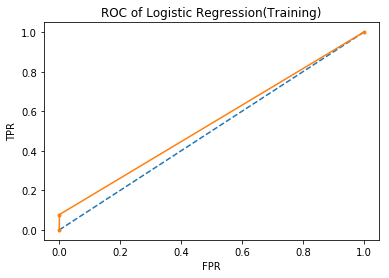

In [12]:
yTrain=np.concatenate(np.array(y_train))
#Calculating Coeffifients using training data
W=MiniBatch_GradDescent(XTrain,yTrain,0.1,50,32)
TrainPrediction=predict(XTrain,W)

confusion = confusion_matrix(y_train,TrainPrediction)
print("Confusion Matrix : ")
print(confusion)

accuracy = accuracy_score(y_train, TrainPrediction)
print("accuracy = {}".format(accuracy))

precision = precision_score(y_train, TrainPrediction)
print("precision = {}".format(precision))

recall = recall_score(y_train, TrainPrediction)
print("recall = {}".format(recall))

F1 = f1_score(y_train, TrainPrediction)
print("F1 = {}".format(F1))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, TrainPrediction)

# calculate AUC
auc = roc_auc_score(y_train, TrainPrediction)
print('AUC = %.3f' % auc)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC of Logistic Regression(Training)')
plt.xlabel("FPR")
plt.ylabel("TPR")
# show the plot
plt.show()

## _1.3:Test Dataset_

Confusion Matrix : 
[[18521     9]
 [  375    32]]
accuracy = 0.979722236890743
precision = 0.7804878048780488
recall = 0.07862407862407862
F1 = 0.14285714285714285
AUC = 0.539


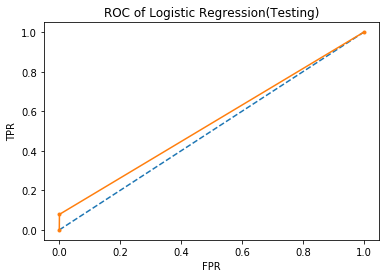

In [13]:
#Predicting class labels of test data using coefficients obtained from training
TestPrediction=predict(XTest,W)

confusion = confusion_matrix(y_test, TestPrediction)
print("Confusion Matrix : ")
print(confusion)

accuracy = accuracy_score(y_test, TestPrediction)
print("accuracy = {}".format(accuracy))

precision = precision_score(y_test, TestPrediction)
print("precision = {}".format(precision))

recall = recall_score(y_test, TestPrediction)
print("recall = {}".format(recall))

F1 = f1_score(y_test, TestPrediction)
print("F1 = {}".format(F1))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, TestPrediction)

# calculate AUC
auc = roc_auc_score(y_test, TestPrediction)
print('AUC = %.3f' % auc)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC of Logistic Regression(Testing)')
plt.xlabel("FPR")
plt.ylabel("TPR")
# show the plot
plt.show()

## _1.4: Classifier Overfitting or Underfitting ?_

## _1.5: Remedy for highly skewed distribution of class label_

### _Method 1:Resampling_

Class 0: 92588
Class 1: 2094
Proportion: 44.22 : 1


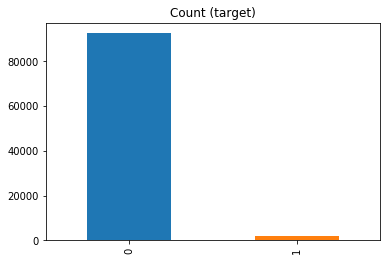

In [14]:
# Checking distribution of class labels 0 & 1
dataset = pd.concat([datasetA, classLabelsA], axis=1, sort=False)
dataset = dataset.rename(index=str, columns={0: "y"})

target_count = dataset.y.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

#### _Random under-sampling_

In [15]:
# Class count
count_class_0, count_class_1 = dataset.y.value_counts()

# Divide by class
df_class_0 = dataset[dataset['y'] == 0]
df_class_1 = dataset[dataset['y'] == 1]

Random under-sampling:
1    2094
0    2094
Name: y, dtype: int64


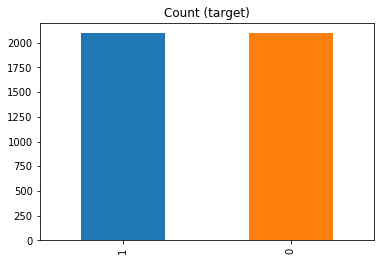

In [16]:
#Random under-sampling
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.y.value_counts())

df_test_under.y.value_counts().plot(kind='bar', title='Count (target)');

In [17]:
#Train-Test split
y=df_test_under['y']
X_train, X_test, y_train, y_test = train_test_split(df_test_under, y, test_size=0.2)
#print(X_train) 
print(X_train.shape) #(3350, 20) 1654 fraudulent 
print(y_train.shape)
#print(X_test) 
print(X_test.shape)  #(838, 20) 440 fraudulent
print(y_test.shape)

(3350, 20)
(3350,)
(838, 20)
(838,)


In [18]:
#Normalizing Training data
sc = preprocessing.MinMaxScaler()
X_train_sc = sc.fit_transform(X_train)
X_trainr_sc = pd.DataFrame(X_train_sc )
print(X_train_sc.shape) 

#Normalizing Test set 
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc)
print(X_test_sc.shape)

(3350, 20)
(838, 20)


In [20]:
## create vector of ones for X0
XTrain = np.hstack([np.ones([X_train_sc.shape[0],1]), X_train_sc])
print(XTrain.shape) #(3350, 21)

XTest = np.hstack([np.ones([X_test_sc.shape[0],1]), X_test_sc])
print(XTest.shape) #(838, 21)


(3350, 21)
(838, 21)


In [21]:
# Selecting only the feature columns
XTrain=XTrain[:,0:20]
XTest=XTest[:,0:20]

#### _Repeating 1.1(10-fold cross validation)_

In [24]:
Error1,Accuracy1 = kfold(XTrain,y_train,0.01,50,32)
Error2,Accuracy2 = kfold(XTrain,y_train,0.01,25,32)
Error3,Accuracy3 = kfold(XTrain,y_train,0.01,10,32)
Error4,Accuracy4 = kfold(XTrain,y_train,0.01,10,64)
Error5,Accuracy5 = kfold(XTrain,y_train,0.1,50,32)
Error6,Accuracy6 = kfold(XTrain,y_train,0.1,25,32)
Error7,Accuracy7 = kfold(XTrain,y_train,0.1,10,32)
Error8,Accuracy8 = kfold(XTrain,y_train,0.1,10,64)
Error9,Accuracy9 = kfold(XTrain,y_train,1,50,32)
Error10,Accuracy10 = kfold(XTrain,y_train,1,25,32)
Error11,Accuracy11 = kfold(XTrain,y_train,1,10,32)
Error12,Accuracy12 = kfold(XTrain,y_train,1,10,64)

In [25]:
df =pd.DataFrame.from_records([{'alpha, iterations, BatchSize': '0.01, 50, 32', 'Prediction Error':Error1,'Accuracy':Accuracy1 },
                               {'alpha, iterations, BatchSize': '0.01, 25, 32', 'Prediction Error':Error2,'Accuracy':Accuracy2},
                               {'alpha, iterations, BatchSize': '0.01, 10, 32', 'Prediction Error':Error3,'Accuracy':Accuracy3},
                               {'alpha, iterations, BatchSize': '0.01, 10, 64', 'Prediction Error':Error4,'Accuracy':Accuracy4},
                               {'alpha, iterations, BatchSize': '0.1, 50, 32', 'Prediction Error':Error5,'Accuracy':Accuracy5},
                               {'alpha, iterations, BatchSize': '0.1, 25, 32', 'Prediction Error':Error6,'Accuracy':Accuracy6},
                               {'alpha, iterations, BatchSize': '0.1, 10, 32', 'Prediction Error':Error7,'Accuracy':Accuracy7},
                               {'alpha, iterations, BatchSize': '0.1, 10, 64', 'Prediction Error':Error8,'Accuracy':Accuracy8},  
                               {'alpha, iterations, BatchSize': '1, 50, 32', 'Prediction Error':Error9,'Accuracy':Accuracy9},
                               {'alpha, iterations, BatchSize': '1, 25, 32', 'Prediction Error':Error10,'Accuracy':Accuracy10},
                               {'alpha, iterations, BatchSize': '1, 10, 32', 'Prediction Error':Error11,'Accuracy':Accuracy11},
                               {'alpha, iterations, BatchSize': '1, 10, 64', 'Prediction Error':Error12,'Accuracy':Accuracy12},
                              ], columns=['alpha, iterations, BatchSize','Prediction Error','Accuracy'])
df

,"alpha, iterations, BatchSize",Prediction Error,Accuracy
0,"0.01, 50, 32",0.466891,0.781791
1,"0.01, 25, 32",0.465362,0.782985
2,"0.01, 10, 32",0.464545,0.783284
3,"0.01, 10, 64",0.469219,0.778806
4,"0.1, 50, 32",0.506319,0.742985
5,"0.1, 25, 32",0.483270,0.765373
6,"0.1, 10, 32",0.493306,0.755224
7,"0.1, 10, 64",0.510203,0.737910
8,"1, 50, 32",0.517392,0.729851
9,"1, 25, 32",0.517110,0.729254


#### _Repeating 1.2_

Confusion Matrix : 
[[1407  246]
 [ 487 1210]]
accuracy = 0.7811940298507463
precision = 0.8310439560439561
recall = 0.713022981732469
F1 = 0.7675229939739929
AUC = 0.782


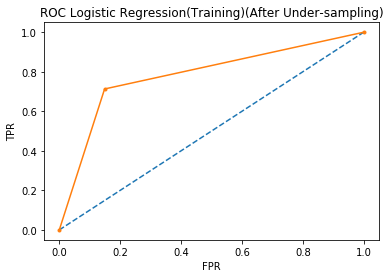

In [26]:
W=MiniBatch_GradDescent(XTrain,y_train,0.01,10,32)
TrainPrediction=predict(XTrain,W)

confusion = confusion_matrix(y_train,TrainPrediction)
print("Confusion Matrix : ")
print(confusion)

accuracy = accuracy_score(y_train, TrainPrediction)
print("accuracy = {}".format(accuracy))

precision = precision_score(y_train, TrainPrediction)
print("precision = {}".format(precision))

recall = recall_score(y_train, TrainPrediction)
print("recall = {}".format(recall))

F1 = f1_score(y_train, TrainPrediction)
print("F1 = {}".format(F1))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train, TrainPrediction)

# calculate AUC
auc = roc_auc_score(y_train, TrainPrediction)
print('AUC = %.3f' % auc)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Logistic Regression(Training)(After Under-sampling)')
plt.xlabel("FPR")
plt.ylabel("TPR")
# show the plot
plt.show()

#### _Repeating 1.3_

Confusion Matrix : 
[[378  63]
 [124 273]]
accuracy = 0.7768496420047732
precision = 0.8125
recall = 0.6876574307304786
F1 = 0.7448840381991815
AUC = 0.772


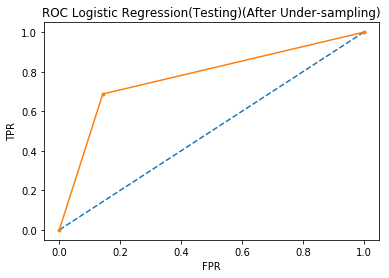

In [27]:
TestPrediction=predict(XTest,W)

confusion = confusion_matrix(y_test, TestPrediction)
print("Confusion Matrix : ")
print(confusion)

accuracy = accuracy_score(y_test, TestPrediction)
print("accuracy = {}".format(accuracy))

precision = precision_score(y_test, TestPrediction)
print("precision = {}".format(precision))

recall = recall_score(y_test, TestPrediction)
print("recall = {}".format(recall))

F1 = f1_score(y_test, TestPrediction)
print("F1 = {}".format(F1))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, TestPrediction)

# calculate AUC
auc = roc_auc_score(y_test, TestPrediction)
print('AUC = %.3f' % auc)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Logistic Regression(Testing)(After Under-sampling)')
plt.xlabel("FPR")
plt.ylabel("TPR")
# show the plot
plt.show()

#### _Repeating 1.4_

### _Other Methods tried_

# _Task 2 : Naive Bayes Classifier (NB)_

## _Data Preprocessing_

In [36]:
#Loading the Data Set Once again(since I did some changes to original data in last task)
datasetA = pd.read_csv('Data/Set-A.X.csv') 
classLabelsA = pd.read_csv('Data/Set-A.y.csv',header=None) 

dataset = pd.concat([datasetA, classLabelsA], axis=1, sort=False)

#convert each of the categorical variables into numerical
le = LabelEncoder()
dataset["state1"] = le.fit_transform(dataset["state1"].astype(str))
dataset["domain1"] = le.fit_transform(dataset["domain1"].astype(str))
dataset

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,0
0,12.95,0,6,925,3,276,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1,0
1,11.01,0,6,925,3,276,1,0,1,11.01,-4276,7,0,1,0,1,1,0,1,0
2,38.85,0,6,928,3,3021,1,0,0,38.85,2602,21,1,0,0,0,0,0,1,0
3,25.90,0,33,77,0,276,1,0,0,25.90,4139,6,0,0,0,1,1,0,1,0
4,12.95,0,6,945,3,9146,0,0,1,12.95,3826,9,1,0,0,1,0,0,1,0
5,38.85,0,6,940,1,7245,1,0,1,38.85,3315,15,4,0,0,0,0,0,1,0
6,25.90,0,11,331,3,494,1,0,1,25.90,3878,8,0,0,0,0,1,0,1,0
7,11.01,0,6,945,3,9146,0,0,1,11.01,3826,9,1,0,0,1,0,0,1,0
8,12.95,0,14,503,3,7599,1,0,0,12.95,-2393,22,0,1,0,1,1,0,2,0
9,49.95,0,6,913,2,276,0,0,0,49.95,-1479,16,0,1,0,1,1,0,1,0


In [37]:
#Splitting SET-A dataset into 80% training and 20% test (holdout set)
y=dataset.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.2)
print(X_train.shape) #(75745, 20)
print(y_train.shape) #(75745,)
print(X_test.shape)  #(18937, 20)
print(y_test.shape)  #(18937,)

(75745, 20)
(75745,)
(18937, 20)
(18937,)


In [38]:
# Converting all from dataframe to array
XTrain = np.array(X_train)
yTrain = np.array(y_train)
XTest = np.array(X_test)
yTest = np.array(y_test)

## _Naive Bayes Classifier (NB)_

In [39]:
#Separate Data By Class-separate the training dataset instances by class value
def separateByClass(dataset):
    separated = {}
    for i in range(0,len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

def mean(numbers):
    return sum(numbers)/float(len(numbers)) 

def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(0,len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities

def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet)))

def NaiveBayesModel(X,y):
    # prepare model
    summaries = summarizeByClass(X)
    # test model
    predictions = getPredictions(summaries, y)
    return predictions

## _2.1: 5-fold Cross Validation_

In [40]:
def kfold(X,y):
    kf = KFold(n_splits=5, shuffle=True)
    i=0
    PredictionError=[]
    AccuracyScores=[]
    for train_index, test_index in kf.split(X):
        i=i+1
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        yprediction = NaiveBayesModel(X_train, X_test) 
        accuracy = getAccuracy(y_test,yprediction)
        
        Error=np.sqrt(mean_squared_error(y_test, yprediction))
        print('Kfold: {0}'.format(i))
        print('Error = {0}'.format(Error))
        print('Accuracy = {0}'.format(accuracy))
        PredictionError.append(Error)
        AccuracyScores.append(accuracy)
        precision = precision_score(y_test, yprediction)
        print("precision = {}".format(precision))
        recall = recall_score(y_test, yprediction)
        print("recall = {}".format(recall))
        F1 = f1_score(y_test, yprediction)
        print("F1 = {}".format(F1))
        
    MSE=sum(PredictionError)/5
    MeanAccuracy=sum(AccuracyScores)/5
    return(MSE,MeanAccuracy)


In [41]:
class1 = kfold(XTrain,yTrain)
class1

Kfold: 1
Error = 0.3122469930978679
Accuracy = 0.90250181530134
precision = 0.10368349249658936
recall = 0.48253968253968255
F1 = 0.17069062324536777
Kfold: 2
Error = 0.3089528200328831
Accuracy = 0.904548154993729
precision = 0.125
recall = 0.5027777777777778
F1 = 0.2002212389380531
Kfold: 3
Error = 0.31235267832448466
Accuracy = 0.902435804343521
precision = 0.1126855600539811
recall = 0.5060606060606061
F1 = 0.18432671081677704
Kfold: 4
Error = 0.31862964884897144
Accuracy = 0.8984751468743811
precision = 0.10996119016817593
recall = 0.5120481927710844
F1 = 0.18104366347177847
Kfold: 5
Error = 0.3252930453973059
Accuracy = 0.8941844346161463
precision = 0.1150278293135436
recall = 0.5195530726256983
F1 = 0.18835443037974683


(0.3154950371403026, 0.9004290712258234)

## _2.2:Train the classifier on the Training Dataset_

Confusion Matrix : 
[[67270  6780]
 [  822   873]]
accuracy = 0.8996369397319955
precision = 0.11407291258330067
recall = 0.5150442477876106
F1 = 0.18677792041078306
AUC = 0.712


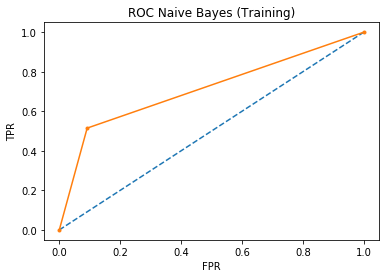

In [42]:
TrainPrediction = NaiveBayesModel(XTrain, XTrain)

confusion = confusion_matrix(yTrain,TrainPrediction)
print("Confusion Matrix : ")
print(confusion)

accuracy = accuracy_score(yTrain, TrainPrediction)
print("accuracy = {}".format(accuracy))

precision = precision_score(yTrain, TrainPrediction)
print("precision = {}".format(precision))

recall = recall_score(yTrain, TrainPrediction)
print("recall = {}".format(recall))

F1 = f1_score(yTrain, TrainPrediction)
print("F1 = {}".format(F1))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(yTrain, TrainPrediction)

# calculate AUC
auc = roc_auc_score(yTrain, TrainPrediction)
print('AUC = %.3f' % auc)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Naive Bayes (Training)')
plt.xlabel("FPR")
plt.ylabel("TPR")
# show the plot
plt.show()

## _2.3:Test the classifier on the Test Dataset_

Confusion Matrix : 
[[16847  1691]
 [  193   206]]
accuracy = 0.9005122247452078
precision = 0.10859251449657353
recall = 0.5162907268170426
F1 = 0.1794425087108014
AUC = 0.713


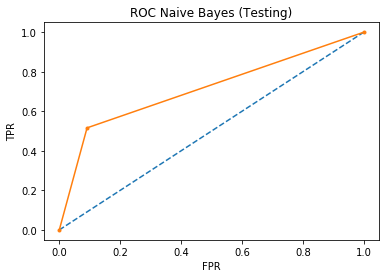

In [43]:
TestPrediction = NaiveBayesModel(XTrain, XTest)

confusion = confusion_matrix(yTest, TestPrediction)
print("Confusion Matrix : ")
print(confusion)

accuracy = accuracy_score(yTest, TestPrediction)
print("accuracy = {}".format(accuracy))

precision = precision_score(yTest, TestPrediction)
print("precision = {}".format(precision))

recall = recall_score(yTest, TestPrediction)
print("recall = {}".format(recall))

F1 = f1_score(yTest, TestPrediction)
print("F1 = {}".format(F1))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(yTest, TestPrediction)

# calculate AUC
auc = roc_auc_score(yTest, TestPrediction)
print('AUC = %.3f' % auc)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Naive Bayes (Testing)')
plt.xlabel("FPR")
plt.ylabel("TPR")
# show the plot
plt.show()

## _2.4: Classifier Overfitting or Underfitting ?_

## _2.5: Remedy for highly skewed distribution of class label_

### _Resampling(Random under-sampling)_

Class 0: 92588
Class 1: 2094
Proportion: 44.22 : 1


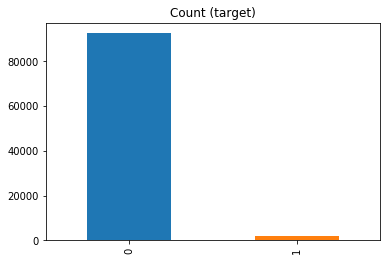

In [44]:
dataset = dataset.rename(index=str, columns={0: "y"})
target_count = dataset.y.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

Random under-sampling:
1    2094
0    2094
Name: y, dtype: int64


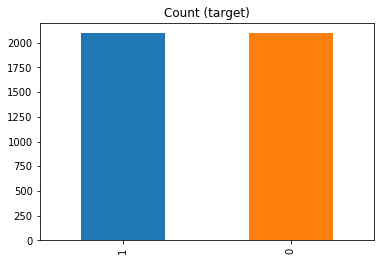

In [45]:
# Class count
count_class_0, count_class_1 = dataset.y.value_counts()

# Divide by class
df_class_0 = dataset[dataset['y'] == 0]
df_class_1 = dataset[dataset['y'] == 1]

#Random under-sampling
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.y.value_counts())

df_test_under.y.value_counts().plot(kind='bar', title='Count (target)');

In [47]:
#Splitting SET-A dataset into 80% training and 20% test (holdout set)
y=df_test_under['y']
X_train, X_test, y_train, y_test = train_test_split(df_test_under, y, test_size=0.2)
print(X_train.shape) #(3350, 20) 1654 fraudulent 
print(y_train.shape)
print(X_test.shape)  #(838, 20) 440 fraudulent
print(y_test.shape)

(3350, 20)
(3350,)
(838, 20)
(838,)


In [48]:
XTrain = np.array(X_train)
yTrain = np.array(y_train)
XTest = np.array(X_test)
yTest = np.array(y_test)

### _Repeating 2.1_

In [49]:
class2 = kfold(XTrain,yTrain)
class2

Kfold: 1
Error = 0.5110714527839979
Accuracy = 0.7388059701492538
precision = 0.8164251207729468
recall = 0.5522875816993464
F1 = 0.658869395711501
Kfold: 2
Error = 0.5325242619376499
Accuracy = 0.7164179104477612
precision = 0.8640350877192983
recall = 0.5533707865168539
F1 = 0.6746575342465754
Kfold: 3
Error = 0.5283033954196588
Accuracy = 0.7208955223880597
precision = 0.8663101604278075
recall = 0.5
F1 = 0.6340508806262232
Kfold: 4
Error = 0.4947485415875271
Accuracy = 0.755223880597015
precision = 0.8823529411764706
recall = 0.5855855855855856
F1 = 0.703971119133574
Kfold: 5
Error = 0.6289057068112051
Accuracy = 0.6044776119402985
precision = 0.8508771929824561
recall = 0.2811594202898551
F1 = 0.4226579520697168


(0.5391106717080077, 0.7071641791044776)

### _Repeating 2.2_

Confusion Matrix : 
[[1539  147]
 [ 765  899]]
accuracy = 0.7277611940298507
precision = 0.8594646271510517
recall = 0.5402644230769231
F1 = 0.6634686346863469
AUC = 0.727


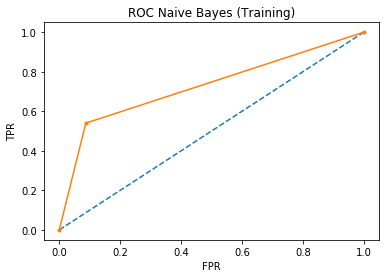

In [50]:
TrainPrediction = NaiveBayesModel(XTrain, XTrain)

confusion = confusion_matrix(yTrain,TrainPrediction)
print("Confusion Matrix : ")
print(confusion)

accuracy = accuracy_score(yTrain, TrainPrediction)
print("accuracy = {}".format(accuracy))

precision = precision_score(yTrain, TrainPrediction)
print("precision = {}".format(precision))

recall = recall_score(yTrain, TrainPrediction)
print("recall = {}".format(recall))

F1 = f1_score(yTrain, TrainPrediction)
print("F1 = {}".format(F1))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(yTrain, TrainPrediction)

# calculate AUC
auc = roc_auc_score(yTrain, TrainPrediction)
print('AUC = %.3f' % auc)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Naive Bayes (Training)')
plt.xlabel("FPR")
plt.ylabel("TPR")
# show the plot
plt.show()

### _Repeating 2.3_

Confusion Matrix : 
[[376  32]
 [202 228]]
accuracy = 0.720763723150358
precision = 0.8769230769230769
recall = 0.5302325581395348
F1 = 0.6608695652173913
AUC = 0.726


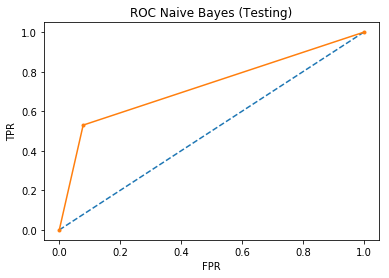

In [51]:
TestPrediction = NaiveBayesModel(XTrain, XTest)

confusion = confusion_matrix(yTest, TestPrediction)
print("Confusion Matrix : ")
print(confusion)

accuracy = accuracy_score(yTest, TestPrediction)
print("accuracy = {}".format(accuracy))

precision = precision_score(yTest, TestPrediction)
print("precision = {}".format(precision))

recall = recall_score(yTest, TestPrediction)
print("recall = {}".format(recall))

F1 = f1_score(yTest, TestPrediction)
print("F1 = {}".format(F1))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(yTest, TestPrediction)

# calculate AUC
auc = roc_auc_score(yTest, TestPrediction)
print('AUC = %.3f' % auc)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Naive Bayes (Testing)')
plt.xlabel("FPR")
plt.ylabel("TPR")
# show the plot
plt.show()

### _Repeating 2.4_

# _Task 3 : kNN Classifier (kNN)_

## _Data Preprocessing_

In [33]:
#Loading the Reduced Dataset containing 10000 datas since full dataset taking very long time to execute 
datasetA = pd.read_csv('ReducedDataTask3/Set-A.X.csv') 
classLabelsA = pd.read_csv('ReducedDataTask3/Set-A.y.csv',header=None) 

print(datasetA.info())
print(datasetA.shape) #(10000, 19)
print(classLabelsA.shape) #(10000, 1)  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
amount        5000 non-null float64
hour1         5000 non-null int64
state1        5000 non-null object
zip1          5000 non-null int64
field1        5000 non-null int64
domain1       5000 non-null object
field2        5000 non-null int64
hour2         5000 non-null int64
flag1         5000 non-null int64
total         5000 non-null float64
field3        5000 non-null int64
field4        5000 non-null int64
field5        5000 non-null int64
indicator1    5000 non-null int64
indicator2    5000 non-null int64
flag2         5000 non-null int64
flag3         5000 non-null int64
flag4         5000 non-null int64
flag5         5000 non-null int64
dtypes: float64(2), int64(15), object(2)
memory usage: 742.3+ KB
None
(5000, 19)
(5000, 1)


In [34]:
Dataset_A = pd.concat([datasetA, classLabelsA], axis=1, sort=False)
#convert each of the categorical variables into numerical
le = LabelEncoder()
Dataset_A["state1"] = le.fit_transform(Dataset_A["state1"].astype(str))
Dataset_A["domain1"] = le.fit_transform(Dataset_A["domain1"].astype(str))
Dataset_A

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5,0
0,12.95,0,4,925,3,36,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1,0
1,11.01,0,4,925,3,36,1,0,1,11.01,-4276,7,0,1,0,1,1,0,1,0
2,38.85,0,4,928,3,323,1,0,0,38.85,2602,21,1,0,0,0,0,0,1,0
3,25.90,0,31,77,0,36,1,0,0,25.90,4139,6,0,0,0,1,1,0,1,0
4,12.95,0,4,945,3,903,0,0,1,12.95,3826,9,1,0,0,1,0,0,1,0
5,38.85,0,4,940,1,719,1,0,1,38.85,3315,15,4,0,0,0,0,0,1,0
6,25.90,0,9,331,3,70,1,0,1,25.90,3878,8,0,0,0,0,1,0,1,0
7,11.01,0,4,945,3,903,0,0,1,11.01,3826,9,1,0,0,1,0,0,1,0
8,12.95,0,12,503,3,754,1,0,0,12.95,-2393,22,0,1,0,1,1,0,2,0
9,49.95,0,4,913,2,36,0,0,0,49.95,-1479,16,0,1,0,1,1,0,1,0


In [35]:
#Splitting SET-A dataset into 80% training and 20% test (holdout set)
y=Dataset_A.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(Dataset_A, y, test_size=0.2)
#print(X_train) 
print(X_train.shape) #(8000, 20)
print(y_train.shape) #(8000,)
#print(X_test) 
print(X_test.shape)  #(2000, 20)
print(y_test.shape)  #(2000,)

(4000, 20)
(4000,)
(1000, 20)
(1000,)


In [36]:
#Normalizing Training data
sc = preprocessing.MinMaxScaler()
X_train_sc = sc.fit_transform(X_train)
X_trainr_sc = pd.DataFrame(X_train_sc )
print(X_train_sc.shape) 

#Normalizing Test set 
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc)
print(X_test_sc.shape) 

# This step will normalize all the input features to unit vector and hence we can calculate Euclidean distance


(4000, 20)
(1000, 20)


In [37]:
# Converting all from dataframe to array
XTrain = np.array(X_train_sc)
yTrain = np.array(y_train)
XTest = np.array(X_test_sc)
yTest = np.array(y_test)

## _kNN Classifier (kNN)_

In [38]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

def knnModel(train,test,k):
    # generate predictions
    predictions=[]
    for x in range(len(test)):
        neighbors = getNeighbors(train, test[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
    return predictions
    

## _3.1: 10-fold Cross Validation to obtain the best value for k_

In [39]:
def kfold(X,y,k):
    kf = KFold(n_splits=10, shuffle=True)
    i=0
    #PredictionError=[]
    AccuracyScores=[]
    for train_index, test_index in kf.split(X):
        i=i+1
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        yprediction = knnModel(X_train,X_test,k)
        accuracy = getAccuracy(y_test,yprediction)
        #print('Kfold: {0}'.format(i))
        #print('Accuracy = {0}'.format(accuracy))
        AccuracyScores.append(accuracy)
        
    MeanAccuracy=sum(AccuracyScores)/10
    return(MeanAccuracy)

In [29]:
#Accuracy1,Precision1,Recall1,F11 = kfold(XTrain,yTrain,1)
#Accuracy2,Precision2,Recall2,F12 = kfold(XTrain,yTrain,3)
#Accuracy3 = kfold(XTrain,yTrain,5)
#Accuracy4,Precision4,Recall4,F14 = kfold(XTrain,yTrain,9)

In [31]:
# df =pd.DataFrame.from_records([{'k': '1', 'Accuracy':Accuracy1,'Precision':Precision1,'Recall':Recall1,'F1':F11},
#                                {'k': '3', 'Accuracy':Accuracy2,'Precision':Precision2,'Recall':Recall2,'F1':F12},
#                                {'k': '5', 'Accuracy':Accuracy3,'Precision':Precision3,'Recall':Recall3,'F1':F13},
#                                {'k': '9', 'Accuracy':Accuracy4,'Precision':Precision4,'Recall':Recall4,'F1':F14},
#                               ], columns=['k','Accuracy','Precision','Recall','F1'])
# df

## _3.2:Train the classifier on the training set_

Confusion Matrix : 
[[3946    1]
 [  49    4]]
accuracy = 98.75
precision = 0.8
recall = 0.07547169811320754
F1 = 0.13793103448275862
AUC = 0.538


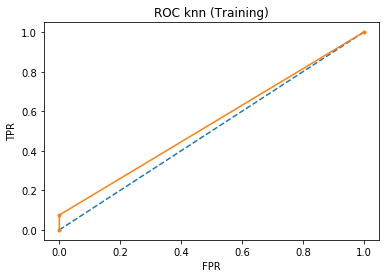

In [40]:
k=5
TrainPrediction = knnModel(XTrain,XTrain,k)
accuracy = getAccuracy(yTrain,TrainPrediction)

confusion = confusion_matrix(yTrain,TrainPrediction)
print("Confusion Matrix : ")
print(confusion)

print("accuracy = {}".format(accuracy))

precision = precision_score(yTrain, TrainPrediction)
print("precision = {}".format(precision))

recall = recall_score(yTrain, TrainPrediction)
print("recall = {}".format(recall))

F1 = f1_score(yTrain, TrainPrediction)
print("F1 = {}".format(F1))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(yTrain, TrainPrediction)

# calculate AUC
auc = roc_auc_score(yTrain, TrainPrediction)
print('AUC = %.3f' % auc)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC knn (Training)')
plt.xlabel("FPR")
plt.ylabel("TPR")
# show the plot
plt.show()


## _3.3:Test Dataset_

Confusion Matrix : 
[[991   0]
 [  9   0]]
accuracy = 99.1
precision = 0.0
recall = 0.0
F1 = 0.0
AUC = 0.500


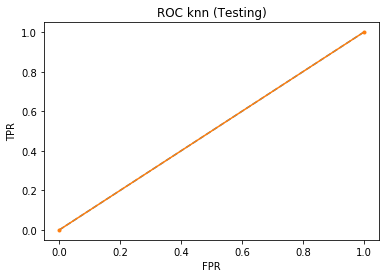

In [41]:
k=5
TestPrediction = knnModel(XTrain,XTest,k)
accuracy = getAccuracy(yTest,TestPrediction)

confusion = confusion_matrix(yTest, TestPrediction)
print("Confusion Matrix : ")
print(confusion)

print("accuracy = {}".format(accuracy))

precision = precision_score(yTest, TestPrediction)
print("precision = {}".format(precision))

recall = recall_score(yTest, TestPrediction)
print("recall = {}".format(recall))

F1 = f1_score(yTest, TestPrediction)
print("F1 = {}".format(F1))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(yTest, TestPrediction)

# calculate AUC
auc = roc_auc_score(yTest, TestPrediction)
print('AUC = %.3f' % auc)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC knn (Testing)')
plt.xlabel("FPR")
plt.ylabel("TPR")
# show the plot
plt.show()

## _3.4: Classifier Overfitting or Underfitting ?_

## _3.5: Remedy for highly skewed distribution of class label_

### _Resampling(Random under-sampling)_

In [42]:
FulldatasetA = pd.read_csv('Data/Set-A.X.csv') #94682 
FullclassLabelsA = pd.read_csv('Data/Set-A.y.csv',header=None) 

dataset = pd.concat([FulldatasetA, FullclassLabelsA], axis=1, sort=False)

le = LabelEncoder()
dataset["state1"] = le.fit_transform(dataset["state1"].astype(str))
dataset["domain1"] = le.fit_transform(dataset["domain1"].astype(str))

dataset = dataset.rename(index=str, columns={0: "y"})


Class 0: 92588
Class 1: 2094
Proportion: 44.22 : 1


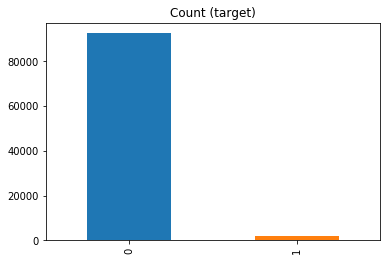

In [43]:
target_count = dataset.y.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

Random under-sampling:
1    2094
0    2094
Name: y, dtype: int64


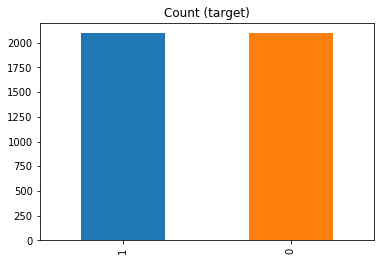

In [44]:
# Class count
count_class_0, count_class_1 = dataset.y.value_counts()

# Divide by class
df_class_0 = dataset[dataset['y'] == 0]
df_class_1 = dataset[dataset['y'] == 1]

#Random under-sampling
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.y.value_counts())

df_test_under.y.value_counts().plot(kind='bar', title='Count (target)');

In [45]:
#Splitting SET-A dataset into 80% training and 20% test (holdout set)
y=df_test_under['y']
X_train, X_test, y_train, y_test = train_test_split(df_test_under, y, test_size=0.2)
#print(X_train) 
print(X_train.shape) #(3350, 20) 1654 fraudulent 
print(y_train.shape)
#print(X_test) 
print(X_test.shape)  #(838, 20) 440 fraudulent
print(y_test.shape)

(3350, 20)
(3350,)
(838, 20)
(838,)


In [46]:
#Normalizing Training data
sc = preprocessing.MinMaxScaler()
X_train_sc = sc.fit_transform(X_train)
X_trainr_sc = pd.DataFrame(X_train_sc )
#print(X_train_sc)
print(X_train_sc.shape) 
print(X_train_sc)
#Normalizing Test set 
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc)
#print(X_test_sc)
print(X_test_sc.shape) 

(3350, 20)
[[0.52358491 0.82608696 0.09803922 ... 0.         0.         0.        ]
 [0.10859539 0.52173913 0.19607843 ... 0.         0.         1.        ]
 [0.32578616 0.52173913 0.68627451 ... 0.         0.         0.        ]
 ...
 [0.4072327  0.91304348 0.80392157 ... 0.         0.         0.        ]
 [0.10859539 0.69565217 0.19607843 ... 0.         0.         0.        ]
 [0.4072327  0.30434783 0.21568627 ... 0.         0.         1.        ]]
(838, 20)


In [47]:
XTrain = np.array(X_train)
yTrain = np.array(y_train)
XTest = np.array(X_test)
yTest = np.array(y_test)

### _Repeating 3.1_

In [ ]:
Accuracy1 = kfold(XTrain,yTrain,5)
Accuracy1

### _Repeating 3.2_

Confusion Matrix : 
[[1204  460]
 [ 434 1252]]
accuracy = 73.31343283582089
precision = 0.7313084112149533
recall = 0.7425860023724793
F1 = 0.736904061212478
AUC = 0.733


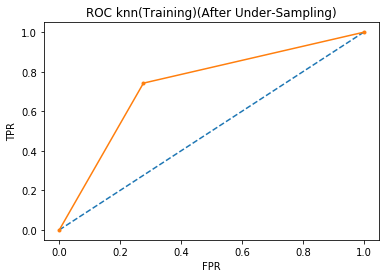

In [48]:
k=5
TrainPrediction = knnModel(XTrain,XTrain,k)
accuracy = getAccuracy(yTrain,TrainPrediction)

confusion = confusion_matrix(yTrain,TrainPrediction)
print("Confusion Matrix : ")
print(confusion)

print("accuracy = {}".format(accuracy))

precision = precision_score(yTrain, TrainPrediction)
print("precision = {}".format(precision))

recall = recall_score(yTrain, TrainPrediction)
print("recall = {}".format(recall))

F1 = f1_score(yTrain, TrainPrediction)
print("F1 = {}".format(F1))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(yTrain, TrainPrediction)

# calculate AUC
auc = roc_auc_score(yTrain, TrainPrediction)
print('AUC = %.3f' % auc)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC knn(Training)(After Under-Sampling)')
plt.xlabel("FPR")
plt.ylabel("TPR")
# show the plot
plt.show()


### _Repeating 3.3_

Error = 0.6341513788996929
Confusion Matrix : 
[[249 181]
 [156 252]]
accuracy = 59.785202863961814
precision = 0.581986143187067
recall = 0.6176470588235294
F1 = 0.5992865636147444
AUC = 0.598


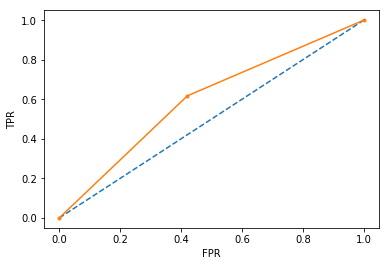

In [52]:
k=5
TestPrediction = knnModel(XTrain,XTest,k)
accuracy = getAccuracy(yTest,TestPrediction)

np.savetxt("knn_Test_Prediction.csv", TestPrediction)

Error=np.sqrt(mean_squared_error(yTest, TestPrediction))
print("Error = {}".format(Error))

confusion = confusion_matrix(yTest, TestPrediction)
print("Confusion Matrix : ")
print(confusion)

print("accuracy = {}".format(accuracy))

precision = precision_score(yTest, TestPrediction)
print("precision = {}".format(precision))

recall = recall_score(yTest, TestPrediction)
print("recall = {}".format(recall))

F1 = f1_score(yTest, TestPrediction)
print("F1 = {}".format(F1))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(yTest, TestPrediction)

# calculate AUC
auc = roc_auc_score(yTest, TestPrediction)
print('AUC = %.3f' % auc)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("FPR")
plt.ylabel("TPR")
# show the plot
plt.show()

### _Repeating 3.4_

# _Task 4 : Comparing performances of LR, NB and kNN classifiers_

##  _4.1:_

In [51]:

def find_expected_value(confusion, cost_benefit):
    # if you use a probability matrix instead, this next line will return the same matrix back
    probabilities = confusion.astype('float') / confusion.sum()
    return (probabilities * cost_benefit.astype('float')).sum()

# I am defining a cost matrix like this
cb = np.array([[1, 0], [-1, 100]])

#---------------------------------Logistic Regression Classifier------------------------------------#
conf__LogisticRegression = np.array([[18521, 9], [375, 32]])
Cost_LogisticRegression=find_expected_value(conf__LogisticRegression, cb)
print(Cost_LogisticRegression)

#---------------------------------Naive Bayes Classifier------------------------------------#
conf_NaiveBayes = np.array([[16847  , 1691], [193  , 206]])
Cost_NaiveBayes=find_expected_value(conf_NaiveBayes, cb)
print(Cost_NaiveBayes)

#---------------------------------knn Classifier------------------------------------#
conf_knn = np.array([[3946, 1], [49, 4]])
Cost_knn=find_expected_value(conf_knn, cb)
print(Cost_knn)


1.1272112795057296
1.9672598616465122
1.0742500000000001


##  _4.2:_

##  _4.3:_